# GOAL:
### Analyse the data set and figure out the driving factors for loan deafult.

In [159]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# read the input file
loan_df = pd.read_csv('loan.csv')


/Users/shwetabh.shekhar/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### NOTICE THE WARNING ABOVE
- Observe the warning. It signifies that the file is huge and Pandas is not able to determine the column type of 
  each column because of it.
- We can choose to ignore the warning or we can suppress it or we can fix it by reading the data as an object.
- I am reading the file again with dtype as object, thus there will be no warnings.

In [167]:
loan_df = pd.read_csv('loan.csv', dtype=object)

In [168]:
# check the dimensions and other information
print('Rows and Columns', loan_df.shape)
print(loan_df.info())

Rows and Columns (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None


In [169]:
# let's look at the data
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

# DATA CLEANUP, FIX AND DERIVED COLUMNS


In [170]:
# We have 111 rows and 39717 columns. 
# I observe a lot of null columns and columns having same data.
# We need to first see how many columns have only null data.
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [171]:
# There are too many columns with null data.
# let's remove the columns that have all the null values as they don't serve any value .
loan_df = loan_df.dropna(how='all', axis=1)
loan_df.shape

(39717, 57)

In [172]:
# let's check if their are rows that have all the null values
loan_df.isnull().all(axis=1).sum()

0

In [173]:
# We can also remove columns that have almost all values as null.
# We already have the null column count list above.
# From the list above we can see that mths_since_last_delinq, mths_since_last_record, next_pymnt_d have
# too many null values, so they can be removed.
columns_to_drop =  ["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]

# employee title and length has some null values but they may be useful during bivariate analysis so let's keep it.

# description is not useful for our use case.
columns_to_drop.append("desc")

# Thus drop:  "desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d"

loan_df.drop(labels = columns_to_drop, axis =1, inplace=True)
loan_df.shape

(39717, 53)

In [174]:
# Let's look at the unique value count per column.
# Columns with very few or very large unique value at times are not useful.
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [139]:
# let's also look at the data to see if columns with very less unique values are useful.
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20,0,Feb-96,1,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [175]:
# columsn with very less or very more unique values are not useful to us. Let's remove those columns.
columns_with_1_unique_value = ["tax_liens", "delinq_amnt", "chargeoff_within_12_mths",
                               "acc_now_delinq", "application_type", "policy_code", "collections_12_mths_ex_med",
                               "initial_list_status", "pymnt_plan"] 

# Also, member_id, url have high unique values and they serve no value in any of the anaysis.
# employee title could have been useful with less uniqueness but in the current data set it is of no value.
columns_with_multiple_unique_values = ["member_id", "url", "emp_title"]

loan_df.drop(labels = columns_with_1_unique_value, axis =1, inplace=True)
loan_df.drop(labels = columns_with_multiple_unique_values, axis =1, inplace=True)
loan_df.shape

(39717, 41)

In [176]:
# Also, we see loan_status has 3 unique values but we are not interested in current loans as they are ongoing.
# lets remove those rows; this will help us reduce the row count as well.
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Extract numeric data from non-numeric columns and replace NANs with 0.

In [177]:
# We have imported the current data set as an object. 
# Let's parse the numerical attributes to numeric data types.
# Also few numeric column has unwarranted text appened to it. Let's remove that as well.
# Employee length has years appended it. We can remove that:
# We can use regular expressions to simply extract out numerical contents. The digit flag is used for extracting it.
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')
print('employe_length_unique_before', loan_df.emp_length.unique())

# From above analysis we know it has nan value as well. let's replace nan with 0's
loan_df.emp_length.fillna('0',inplace=True)
print('employe_length_unique_after', loan_df.emp_length.unique())

# Term has years months to it. Let's remove that 
loan_df['term']=loan_df.term.str.extract('(\d+)')

# remove percentage from int_rate and revol_util
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')

employe_length_unique_before ['10' '1' '3' '8' '9' '4' '5' '6' '2' '7' nan]
employe_length_unique_after ['10' '1' '3' '8' '9' '4' '5' '6' '2' '7' '0']


### Convert Object Data Types to Numerical

In [178]:
# lets convert all to numeric data frame
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_df[cols1] = loan_df[cols1].apply(pd.to_numeric)


### Parse Date Data and Derived New Columns for Month and Year

In [179]:
# let's parse dates
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df.issue_d

# we can extract the year and month and create new columns, These columns can further help us analyze in the process
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

In [180]:
# let's finally look at our data set types and columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  object        
 1   loan_amnt                38577 non-null  int64         
 2   funded_amnt              38577 non-null  int64         
 3   funded_amnt_inv          38577 non-null  float64       
 4   term                     38577 non-null  object        
 5   int_rate                 38577 non-null  float64       
 6   installment              38577 non-null  float64       
 7   grade                    38577 non-null  object        
 8   sub_grade                38577 non-null  object        
 9   emp_length               38577 non-null  int64         
 10  home_ownership           38577 non-null  object        
 11  annual_inc               38577 non-null  float64       
 12  verification_status      38577 n

<h1>Outlier treatment</h1>

- Let's check at major numerical attributes which may have outliers to see which actually does.

/Users/shwetabh.shekhar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

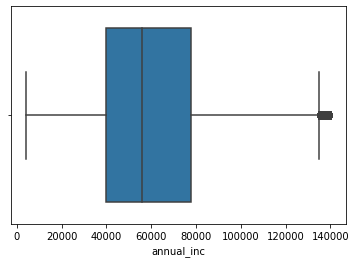

In [181]:
# Let's look at major numerical attributes and see if there are any outliers
annual_income = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= annual_income]
sns.boxplot(loan_df.annual_inc)

# INFERENCE: No Outliers

<AxesSubplot:ylabel='dti'>

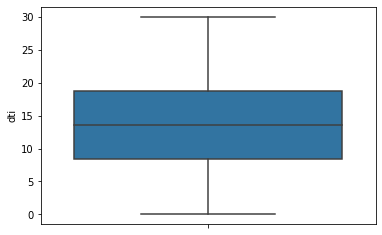

In [182]:
# Let's check the box plot for debt to income ratio
sns.boxplot(y=loan_df.dti)

# INFERENCE: No Outliers

<AxesSubplot:ylabel='loan_amnt'>

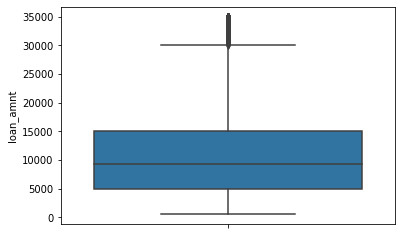

In [184]:
# Let's check the box plot for loan amount
loan_df['loan_amnt'].describe()
sns.boxplot(y=loan_df["loan_amnt"])
# INFERENCE: No Outliers

quantile_info 0.50    56,000.00
0.75    77,970.50
0.90   100,000.00
0.95   117,000.00
0.97   124,000.00
0.98   129,000.00
0.99   135,000.00
Name: annual_inc, dtype: float64


/Users/shwetabh.shekhar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


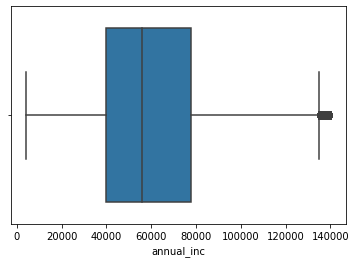

In [185]:
# Let's check the box plot for annual income
sns.boxplot(loan_df['annual_inc'])
# The graph shows the presence of outliers
# Let's see the quantile info and take an appropriate action.
# The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
# So, considering threshold for removing outliers as 0.95

quantile_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
print('quantile_info', quantile_info)

# INFERENCE: PRESENCE OF OUTLIERS

# Univariate Analysis

count   36,654.00
mean    10,682.25
std      7,048.41
min        500.00
25%      5,000.00
50%      9,250.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64


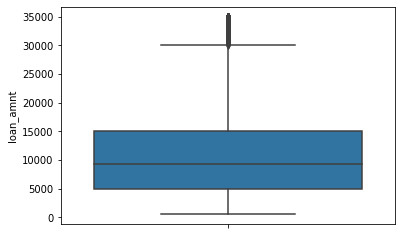

In [58]:
# let's understand what is the average loan amount being taken for fully paid and charged off loans
sns.boxplot(y=loan_df.loan_amnt)
print(loan_df.loan_amnt.describe())

#### Inference: The loan amount varies from 0 to 15,000 having mean of 10,000.

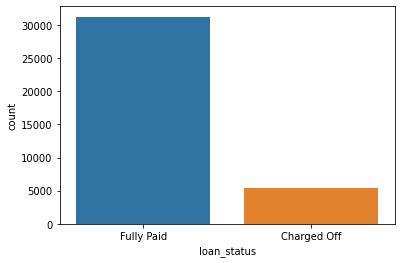

Fully Paid     31236
Charged Off     5418
Name: loan_status, dtype: int64


In [186]:
# let's see what percentage of loan is defaulted/charged off
sns.countplot(x = loan_df["loan_status"])
plt.show()
print(loan_df.loan_status.value_counts())

#### Inference: Most of the loans are Fully Paid. The charged off loan percenatge is (5418/31236+5418)*100 = 14.78%

count   36,654.00
mean        11.89
std          3.67
min          5.42
25%          8.94
50%         11.71
75%         14.27
max         24.40
Name: int_rate, dtype: float64


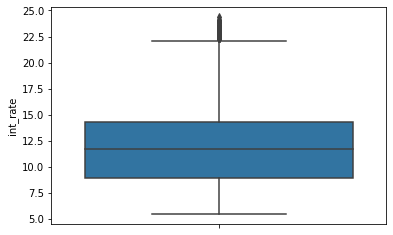

In [187]:
# Interest Rates
sns.boxplot(y=loan_df.int_rate)
print(loan_df['int_rate'].describe())

#### Inference: Average Interest rate is around 12%

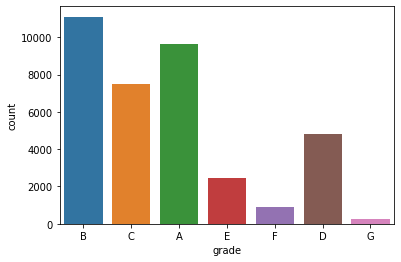

In [188]:
# let's see the grade of loans
sns.countplot(x='grade', data=loan_df)
plt.show()

#### Inference: Most loans are low graded loans.

count    36,654.00
mean     60,855.75
std      27,750.28
min       4,000.00
25%      40,000.00
50%      56,000.00
75%      77,970.50
max     140,004.00
Name: annual_inc, dtype: float64


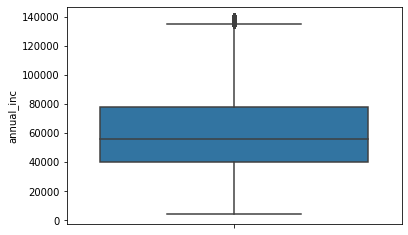

In [189]:
sns.boxplot(y=loan_df.annual_inc)
print(loan_df['annual_inc'].describe())

#### Inference: The annual income of most of the loan applicants is in the ranege of 40,000 to 80,000. Very few people earn above 100,000.

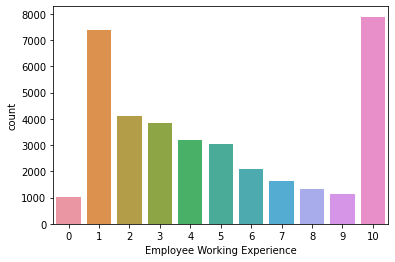

In [190]:
sns.countplot(x='emp_length', data=loan_df)
plt.xlabel('Employee Working Experience')
plt.show()

#### Inference: People with 10+ years of work experince apply for most of the loans. And people with 0-1 years experince are the second most category of people applying for loans.

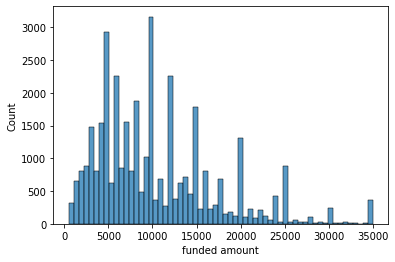

In [196]:
sns.histplot(x=loan_df['funded_amnt'])
plt.xlabel('funded amount')
plt.show()

#### Inference: Too many loans are being taken for less amount.

## Segmented Univariate Analysis - Unordered Categorical Variables

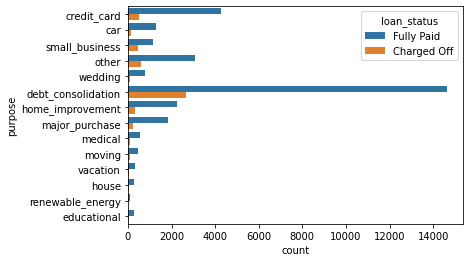

In [73]:
# purpose of loans
sns.countplot(y="purpose", hue='loan_status', data=loan_df)
plt.show()

#### Inference: Debt Consolidation is the most popular category for loans.


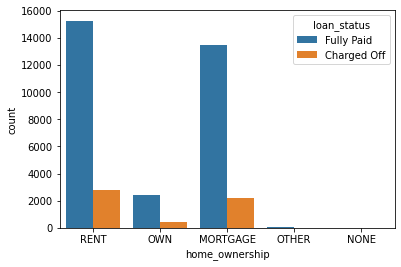

In [199]:
# Home ownership
sns.countplot(x='home_ownership', hue='loan_status', data=loan_df)
plt.show()

#### Inference: Most people taking loans and defaulting are living in rented homes.

# Segmented Univariate Analysis: Ordered Categorical Variables

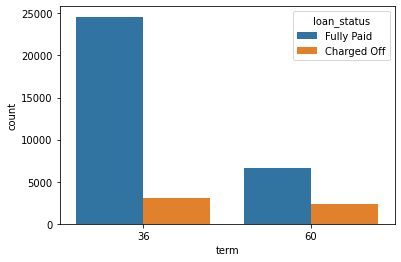

In [198]:
sns.countplot(x="term", data=loan_df, hue='loan_status')
plt.show()

#### Inference: Those who take 60 months to repay the loan have a higher chance of defaulting the loan.

# Bivaraiate Analysis

- Here the goal is to understand how various parameters are responsible for defaulting the loan.
- Let's analyze how Demograhics are responsible for defaulting loan, like state, annual income, employee's years of service and so on.
- We can then look at how interest rate, loan amount and other factors affect the loan defaulting.

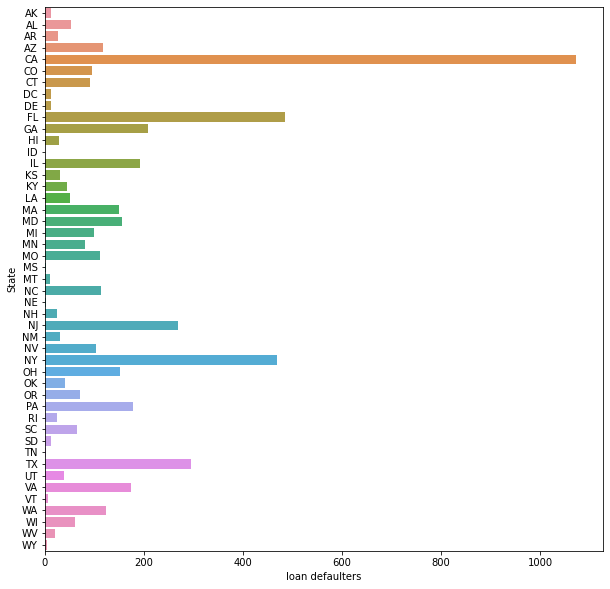

In [83]:
# how state is responsible for loan default
plt.figure(figsize=(10,10))
filtered_data = loan_df[loan_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
sns.barplot(y='addr_state', x='loan_status', data=filtered_data)
plt.xlabel('loan defaulters')
plt.ylabel('State')
plt.show()

#### Inference: If a person is applying for a loan from California, he has a high chance of defaulting the loan.

### Creating Bins For Analysis
 - Since annual income data is huge, it is better to analyze it in ranges.

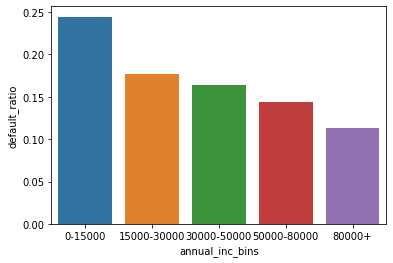

In [200]:
# let's also see how annual income affects.
# since annual income has a huge range, let's create bins and see which bin range is repsonsible towards defaulting
loan_df['annual_inc_bins'] = pd.cut(loan_df['annual_inc'], [0, 15000, 30000, 50000, 80000, 1000000], labels=['0-15000', '15000-30000', '30000-50000', '50000-80000', '80000+'])

# we need to look at data in terms of percentages because a higher or lower number of charge off has to be tested in percentages
annual_income = loan_df.groupby(['annual_inc_bins', 'loan_status']).loan_status.count().unstack().reset_index()
annual_income['total_count'] = annual_income['Charged Off'] + annual_income['Fully Paid'] 
annual_income['default_ratio'] = annual_income['Charged Off'] / annual_income['total_count']

sns.barplot(x='annual_inc_bins', y='default_ratio', data=annual_income)
plt.show()


### Inference: People taking loans in the income range of 10,000-15,000 has a high chances of defaulting the loan.

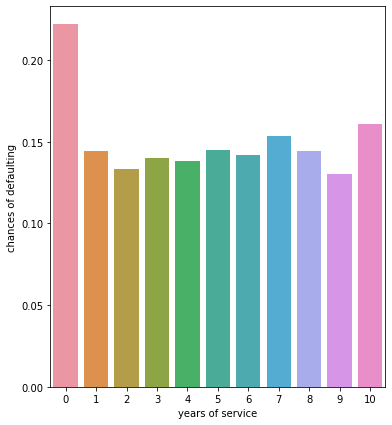

In [205]:
# Let's see how employment length affects the defaulting 
employment_ln_df = loan_df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()

employment_ln_df['total_count'] = employment_ln_df['Charged Off'] + employment_ln_df['Fully Paid'] 
employment_ln_df['default_ratio'] = employment_ln_df['Charged Off'] / employment_ln_df['total_count']

plt.figure(figsize=(6, 7))
sns.barplot(x='emp_length', y='default_ratio', data=employment_ln_df)
plt.xlabel('years of service')
plt.ylabel('chances of defaulting')
plt.show()

#### Inference: Those with 0-1 years of experience has higher chances of defaulting loan.

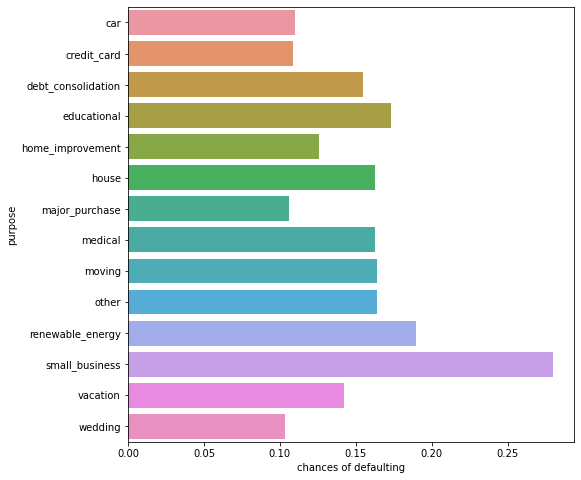

In [211]:
# Let's understand how purpose affectc.
purpose_loan_df = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purpose_loan_df['total_count'] = purpose_loan_df['Charged Off'] + purpose_loan_df['Fully Paid'] 
purpose_loan_df['default_ratio'] = purpose_loan_df['Charged Off'] / purpose_loan_df['total_count']
plt.figure(figsize=(8, 8))
sns.barplot(x='default_ratio', y='purpose', data=purpose_loan_df)
plt.ylabel('purpose')
plt.xlabel('chances of defaulting')
plt.show()

#### Inference: Person availing loan for Small Buisness has a high chances of defaulting it.

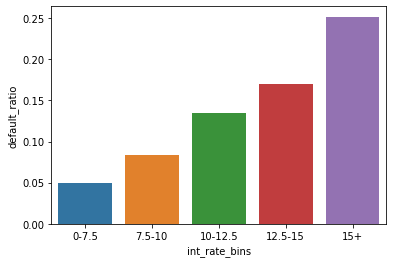

In [209]:
# Let's see how interest rates fare

# let's bin the data to figure out which bin most impacts the default process as people avail loan
# at different interests 
loan_df['int_rate_bins'] = pd.cut(loan_df['int_rate'], [0, 7.5, 10, 12.5, 15, 20], labels=['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+'])

interest_loan_df = loan_df.groupby(['int_rate_bins', 'loan_status']).loan_status.count().unstack().reset_index()
interest_loan_df['total_count'] = interest_loan_df['Charged Off'] + interest_loan_df['Fully Paid'] 
interest_loan_df['default_ratio'] = interest_loan_df['Charged Off'] / interest_loan_df['total_count']

sns.barplot(x='int_rate_bins', y='default_ratio', data=interest_loan_df)

plt.show()

#### Inference: High interest rate loans have a high chance of being charged off, especially when they are 15+

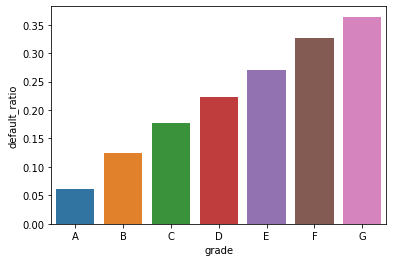

In [210]:
# how loan grade affect the defaulting process

grade_loan_df = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
grade_loan_df['total_count'] = grade_loan_df['Charged Off'] + grade_loan_df['Fully Paid'] 
grade_loan_df['default_ratio'] = grade_loan_df['Charged Off'] / grade_loan_df['total_count']

sns.barplot(x='grade', y='default_ratio', data=grade_loan_df)

plt.show()

#### Inference:  Chances of charged off is increasing with grade moving from "A" towards "G"

#### pub_rec_bankruptcies: Number of public record bankruptcies
- It signifies the person availing loan has defaulted how many times.

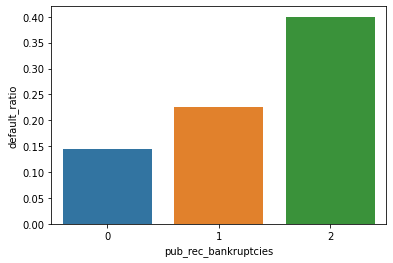

In [151]:
# public bankruptcy

public_bankruptcy_loan_df = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().reset_index()
public_bankruptcy_loan_df['total_count'] = public_bankruptcy_loan_df['Charged Off'] + public_bankruptcy_loan_df['Fully Paid'] 
public_bankruptcy_loan_df['default_ratio'] = public_bankruptcy_loan_df['Charged Off'] / public_bankruptcy_loan_df['total_count']

sns.barplot(x='pub_rec_bankruptcies', y='default_ratio', data=public_bankruptcy_loan_df)

plt.show()

### Inference: People who have defaulted before have a higer chance of defaulting again.

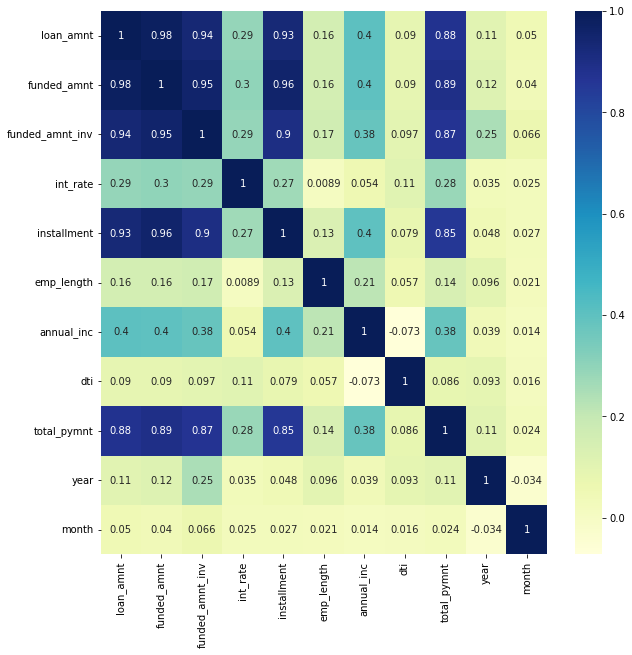

In [158]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(data=loan_df.corr(),  cmap="YlGnBu", annot=True)
plt.show()

# Correlation Matrix does not help us to understandin the driving factors behind loan default although 
# they reveal other information such as loan amount and funded amount have a high correlation and so on.

# Summary 

### Understanding who are taking loans and what kind of loans are being taken.

- Most people who are taking loans and defaulting are living in rented homes.
- Around 14.78% of the loan are currently defaulted. 
- Debt Consolidation is the most popular category for loans.
- Most of the loans are being taken for less amount around 5000/-.
- The loan amount varies from 0 to 15,000 having mean of 10,000.
- People with 10+ years of work experince apply for most of the loans. And people with 0-1 years experince are the second most category of people applying for loans.
- Average interest rate is around 12%.

### Driving Factors for loan default.

- High grade loans are likely to be defaulted.
- Loan being granted to the people of California is likely to be defaulted.
- High interest rate loan has a high chance of being defaulted.
- People who have defaulted before have a higer chance of defaulting again.
- Those with 0-1 years of experience has higher chances of defaulting loan.
- Person availing loan for Small Buisness has a high chances of defaulting it.
- People taking loans in the income range of 10,000-15,000 has a high chances of defaulting the loan.
- Those who take 60 months to repay the loan have a higher chance of defaulting the loan.